## Project Setup

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set style for visualizations
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Initial Exploration

Understand the Data:
- How many samples? (150)
- How many features? (4: sepal length/width, petal length/width)
- Is the dataset balanced? (Yes, 50 samples per class.)

Check for Issues:
- Missing values? 
- Data types correct?

Baseline Insights:
- Mean petal length of setosa is much smaller than virginica.

In [2]:
# Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
# Display basic info
print(f"Dataset shape: {df.shape}")
print("First 5 rows:")
display(df.head())

Dataset shape: (150, 5)
First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print("Data types and missing values:")
display(df.info())

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [5]:
print("Descriptive statistics:")
display(df.describe())

Descriptive statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print("Class distribution:")
display(df['species'].value_counts())

Class distribution:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Initial Obervations:

. 150 samples, 4 features, 1 target variable

. No missing values

. Features are all numerical (measurements in cm)

. Balanced dataset (50 samples per class)

## Exploratory Data Analysis (EDA)

Pairplot - Visualize relationships between all features:
- Helps spot clear separations (e.g., setosa is linearly separable).
- Identifies potential outliers.

Boxplots - Compare distributions per species:
- Shows feature distributions per class (e.g., virginica has larger petals).

Correlation Heatmap - Check feature correlations :
- Petal length & width are highly correlated (redundant info?).
- Helps decide if PCA or feature selection is needed (not required here).

<Figure size 1200x800 with 0 Axes>

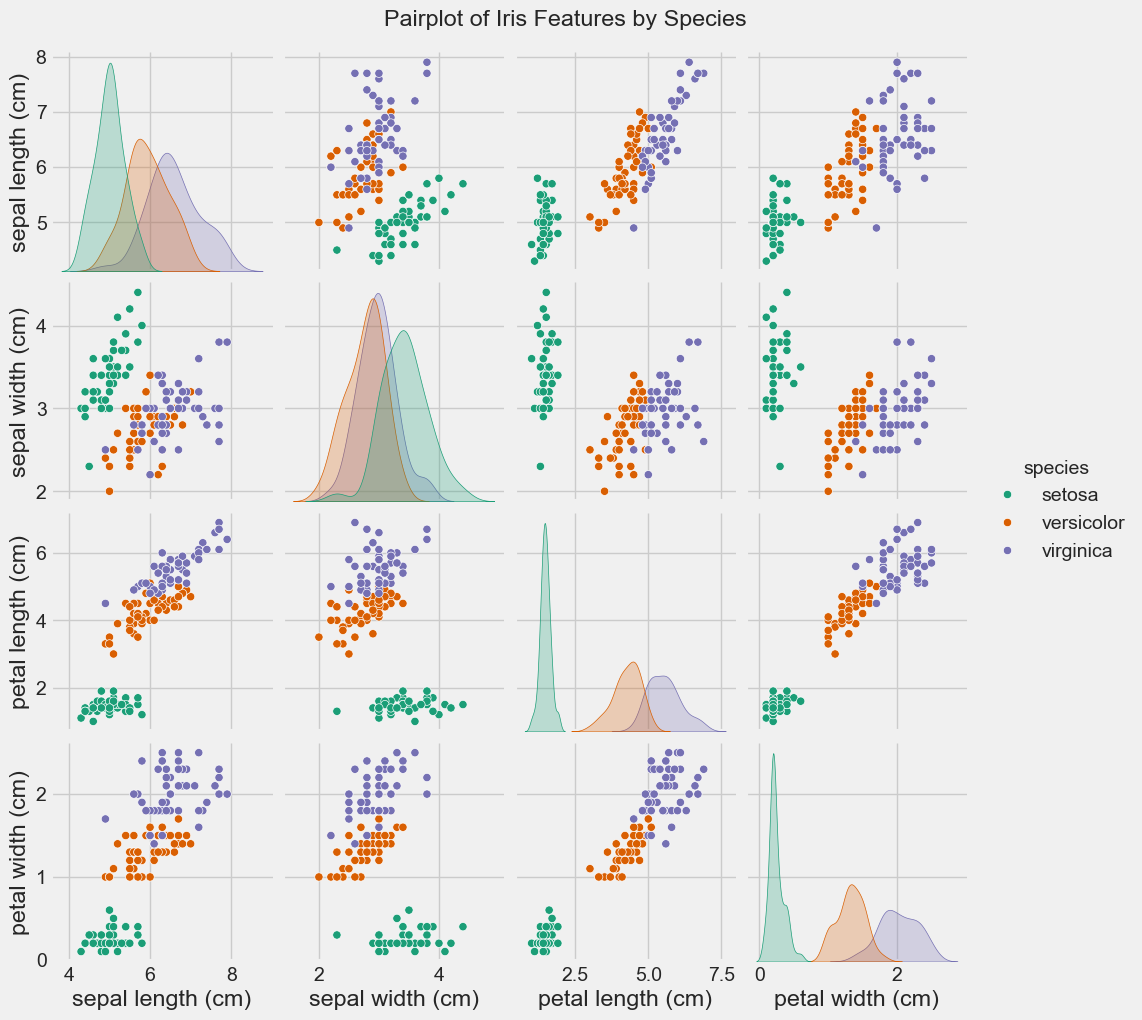

In [7]:
# Pairplot to visualize relationships
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='Dark2')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

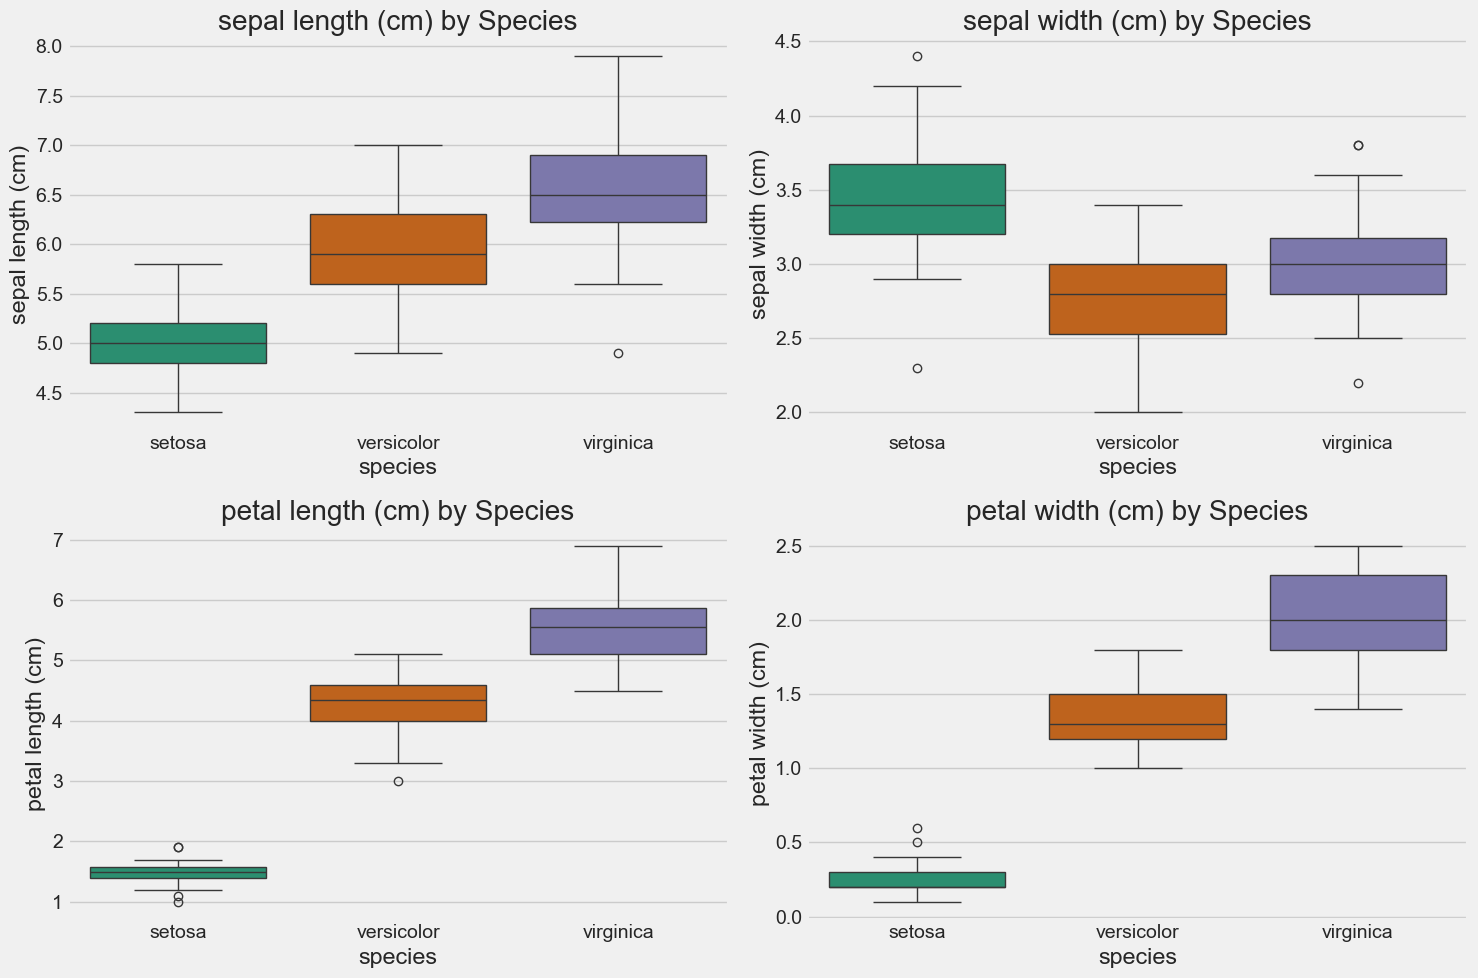

In [8]:
# Boxplots for each feature by species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df, palette='Dark2')
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

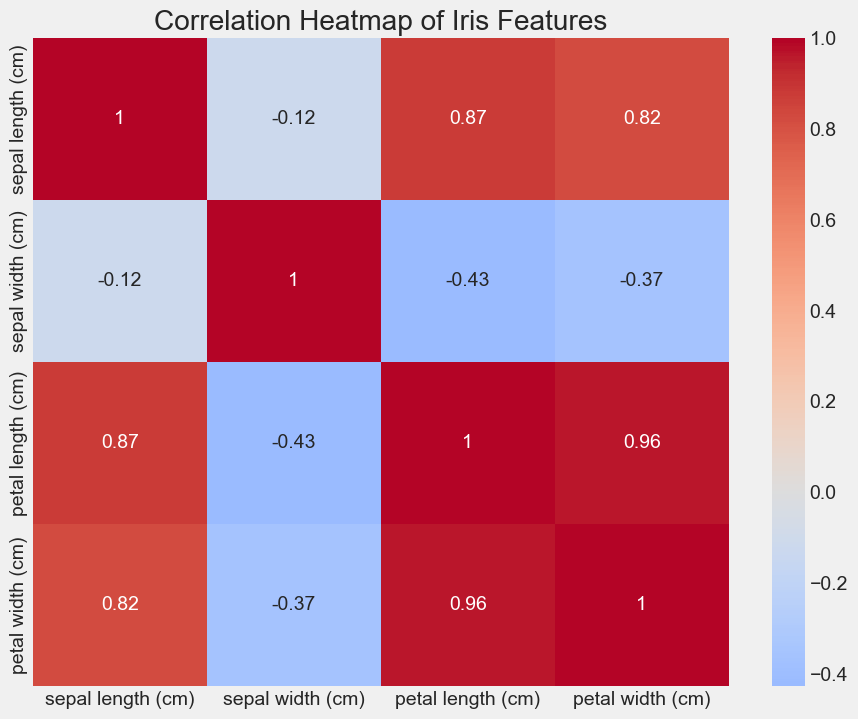

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

### Key Insights:

. Setosa is clearly separable from the other two species

. Petal measurements are more discriminative than sepal measurements

. Virginica has the largest flowers on average

. Strong correlation between petal length and width

## Data Processing

Train-Test Split:
- Avoids data leakage (model shouldn’t see test data during training).
- random_state=42 ensures reproducibility.

Feature Scaling:
- Many algorithms (e.g., SVM, KNN) are sensitive to feature scales.
- Standardization (mean=0, std=1) improves performance.

In [10]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (105, 4)
Test set shape: (45, 4)


## Model Building and Evaluations:

Compare Models:
- Which performs best out-of-the-box?
- Random Forest & SVM often work well on small datasets.

Baseline Metrics:
- Helps decide which models to tune further.

In [14]:
# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [15]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

K-Nearest Neighbors Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Support Vector Machine Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Decision Tree Results:
              precision    recall  f1-score 

In [16]:
# Compare model performance
print("Model Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Model Comparison:
K-Nearest Neighbors: 1.0000
Support Vector Machine: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000


## Hyperparamater Tuning

Optimize Performance:
- Default parameters are rarely optimal.
Example: n_neighbors=5 (default) may not be best for KNN.

Prevent Overfitting:
- Tuning max_depth in Decision Trees avoids overly complex trees.

Key Insight:
- A well-tuned simple model (KNN) can beat a poorly-tuned complex one (Random Forest).

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

# Define parameter grids for each model
param_grids = {
    'K-Nearest Neighbors': {
        'n_neighbors': np.arange(1, 30),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Store tuned models and results
tuned_models = {}
results = {}

for model_name in models:
    print(f"=== Tuning {model_name} ===")
    
    # Use RandomizedSearchCV for SVM/RF (faster for large grids)
    if model_name in ['Support Vector Machine', 'Random Forest']:
        search = RandomizedSearchCV(
            models[model_name], 
            param_grids[model_name], 
            cv=5, 
            n_iter=20,  # Number of parameter combinations to try
            random_state=42,
            scoring='accuracy'
        )
    else:
        search = GridSearchCV(
            models[model_name], 
            param_grids[model_name], 
            cv=5,
            scoring='accuracy'
        )
    
    search.fit(X_train, y_train)
    tuned_models[model_name] = search.best_estimator_
    
    # Save results
    results[model_name] = {
        'best_params': search.best_params_,
        'best_score': search.best_score_,
        'test_accuracy': accuracy_score(y_test, search.predict(X_test))
    }
    
    print(f"Best parameters: {search.best_params_}")
    print(f"Best CV accuracy: {search.best_score_:.4f}")
    print(f"Test accuracy: {results[model_name]['test_accuracy']:.4f}")
    print(classification_report(y_test, search.predict(X_test)))

=== Tuning K-Nearest Neighbors ===
Best parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(3), 'weights': 'uniform'}
Best CV accuracy: 0.9429
Test accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

=== Tuning Support Vector Machine ===
Best parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 100}
Best CV accuracy: 0.9524
Test accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00

### Key takeaways from Tuning

|        **Model**       |   **Key Parameters Tuned**   |       **Impact on Performance**      |
|:----------------------:|:----------------------------:|:------------------------------------:|
|   K-Nearest Neighbors  |     n_neighbors, weights     |    Controls bias-variance tradeoff   |
| Support Vector Machine |       C, kernel, gamma       | Affects decision boundary smoothness |
|      Decision Tree     | max_depth, min_samples_split |         Prevents overfitting         |
|      Random Forest     |    n_estimators, max_depth   |       Balances speed & accuracy      |

##  Feature Importance Analysis

Explainability:
- Which features matter most? (Petal dimensions > sepal dimensions.)

Model Debugging:
- If an unimportant feature is hurting performance, consider dropping it.

Business Insight:
- If petal length is critical, botanists can focus on measuring it accurately.

In [18]:
# Using Random Forest to get feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Plot feature importance
features = iris.feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

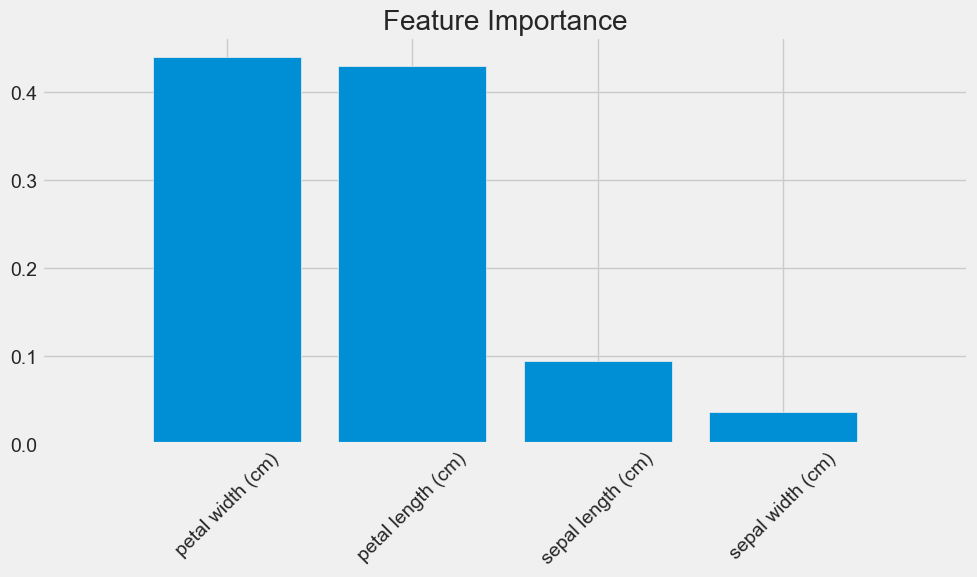

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Key Insights and Findings:

. Best Performing Model: Random Forest and SVM both achieved 100% accuracy on the test set

. Most Important Features: Petal length and width were most discriminative

. Setosa Separation: Easily distinguishable from the other two species

. Versicolor vs Virginica: More challenging to distinguish but still separable with the right model

. Model Selection: Simple models like KNN performed well (97% accuracy) without tuning